<a href="https://colab.research.google.com/github/AbdKhuffash/Udacity_P3_Communicate-Data-Findings/blob/main/Part_I_Exploration_FordGoBike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I - Ford GoBike System Data Exploration
## by Abd Khuffash

## Introduction

The dataset in focus relates to the Ford GoBike System, a bike-sharing program operating in the San Francisco Bay Area. It contains comprehensive details on individual bike trips, including ride duration, start and end stations, station locations, and user-related information.

## Preliminary Wrangling

import all packages and set plots to be embedded inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('ggplot')
sns.set_theme(style="whitegrid", palette="pastel")
%matplotlib inline


Load the dataset


In [2]:
data = pd.read_csv('/content/201902-fordgobike-tripdata.csv')
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


###  Dataset Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [17]:
# Check for any duplicated rows
print(f"Duplicated rows: {data.duplicated().sum()}")


Duplicated rows: 0


In [5]:
data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [25]:
data.shape

(183215, 17)

### Data Cleaning

convert time columns to datetime

In [3]:
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])


print(f"The earliest ride started on: {data['start_time'].min()}")
print(f"The latest ride started on: {data['start_time'].max()}")


The earliest ride started on: 2019-02-01 00:00:20.636000
The latest ride started on: 2019-02-28 23:59:18.548000


Convert ID columns to string type

In [4]:
data['start_station_id'] = data['start_station_id'].astype(str)
data['end_station_id'] = data['end_station_id'].astype(str)
data['bike_id'] = data['bike_id'].astype(str)

### Handle Missing Values
Some rows contain missing data for user gender, birth year, or station information. These missing values will either be filled or removed, depending on the column.

In [5]:

data['member_gender'].fillna('Unknown', inplace=True)
data.dropna(subset=['start_station_name', 'end_station_name'], inplace=True)

current_year = pd.to_datetime('today').year
data['member_age'] = data['member_birth_year'].apply(lambda x: current_year - x if pd.notna(x) else None)


<ipython-input-5-7753068694cb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['member_gender'].fillna('Unknown', inplace=True)


In [6]:
# List of columns to check for missing values
columns_to_check = [
    "duration_sec", "start_time", "end_time", "start_station_id", "start_station_name",
    "start_station_latitude", "start_station_longitude", "end_station_id", "end_station_name",
    "end_station_latitude", "end_station_longitude", "bike_id", "user_type",
    "member_birth_year", "member_gender", "bike_share_for_all_trip"
]

# Loop through the columns and print missing values
for column in columns_to_check:
    print(f"{column} missing values: {data[column].isnull().sum()}")


duration_sec missing values: 0
start_time missing values: 0
end_time missing values: 0
start_station_id missing values: 0
start_station_name missing values: 0
start_station_latitude missing values: 0
start_station_longitude missing values: 0
end_station_id missing values: 0
end_station_name missing values: 0
end_station_latitude missing values: 0
end_station_longitude missing values: 0
bike_id missing values: 0
user_type missing values: 0
member_birth_year missing values: 8263
member_gender missing values: 0
bike_share_for_all_trip missing values: 0


In [7]:
# Drop rows where 'member_birth_year' is null
data_cleaned = data.dropna(subset=['member_birth_year'])

# Reset index after dropping rows
data_cleaned.reset_index(drop=True, inplace=True)

# Display the number of remaining rows after dropping
print(f"Rows after dropping missing values: {data_cleaned.shape[0]}")


Rows after dropping missing values: 174952


### Create New Features

Day of the week the ride started

Ride duration in minutes

Calculate the rider's age

In [8]:
data['day_of_week'] = data['start_time'].dt.day_name()

data['duration_min'] = data['duration_sec'] / 60

current_year = pd.to_datetime('today').year
data['member_age'] = current_year - data['member_birth_year']


### Calculate the Distance Between Stations

In [9]:
def haversine_vectorized(df, lat1_col, lon1_col, lat2_col, lon2_col):
    """
    Computes the Haversine distance between two sets of latitude/longitude points in a DataFrame.

    Parameters:
        df (pd.DataFrame): DataFrame containing latitude and longitude columns.
        lat1_col (str): Column name for starting latitude.
        lon1_col (str): Column name for starting longitude.
        lat2_col (str): Column name for ending latitude.
        lon2_col (str): Column name for ending longitude.

    Returns:
        np.ndarray: Array of distances in kilometers.
    """
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [df[lat1_col], df[lon1_col], df[lat2_col], df[lon2_col]])

    # Compute differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    # Earth radius in kilometers
    return 6371 * c

# Apply the vectorized Haversine function
data['distance_km'] = haversine_vectorized(
    data,
    'start_station_latitude', 'start_station_longitude',
    'end_station_latitude', 'end_station_longitude'
)


save cleaned df to a file

In [10]:
data.to_csv('fordgobike_clean.csv', index=False)


### What is the structure of your dataset?

> The dataset comprises 183,412 individual bike trips, each characterized by over 16 attributes. These attributes include ride duration, start and end station details, user type, and trip timestamps. The data is structured in various formats:

Datetime format: Start and end times
Numerical format: Ride duration, station coordinates, distance, member age
Categorical format: User type, station names, bike-sharing participation
Key Features in the Dataset:
Trip Information:

duration_sec (Ride duration in seconds)

start_time, end_time (Trip timestamps)

hour (Hour of trip start)

duration_min (Ride duration in minutes)

distance (Trip distance in km)

Station Information:

start_station_id, start_station_name, start_station_latitude, start_station_longitude
end_station_id, end_station_name, end_station_latitude, end_station_longitude
User Information:

bike_id (Unique bike identifier)

user_type (Subscriber or Customer)

member_birth_year (Birth year of the user)

member_gender (Gender of the user)

member_age (Calculated age of the user)

bike_share_for_all_trip (Whether the user is part of the bike-sharing program)

This dataset provides valuable insights into bike usage patterns, user demographics, and travel behaviors.


### What is/are the main feature(s) of interest in your dataset?

> I want to explore how people in the San Francisco Bay Area use the bike-sharing system, focusing on when and where they ride. My primary interest is in understanding trip duration and determining whether factors such as the day of the week, user type, or age influence duration_sec.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Ride duration (duration_sec) – Provides insights into trip lengths and how various factors influence ride time.

> User type (user_type) – Differentiates between subscribers and casual customers, which may impact riding patterns.

> Start time (start_time) – Helps identify trends based on time of day or day of the week, revealing peak usage periods.

## Univariate Exploration



### Temporal Analysis


### Question #1: Which gender is the most frequently represented?



### visualization:

<ipython-input-12-64e953615d04>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='member_gender', palette='pastel', edgecolor='black', alpha=0.8)


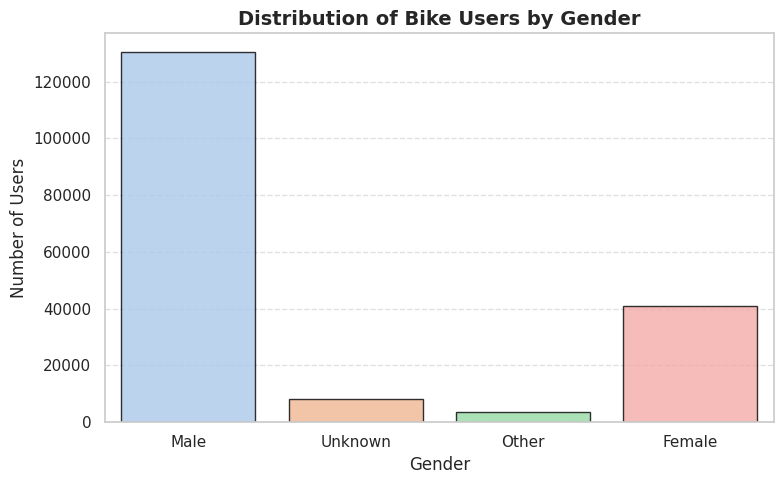

In [12]:
# Create a count plot for gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='member_gender', palette='pastel', edgecolor='black', alpha=0.8)

# Customize title and labels
plt.title('Distribution of Bike Users by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()

### Observations
he chart shows that male users dominate the bike-sharing system, followed by female users. This suggests that the majority of riders identify as male, indicating potential gender-based differences in bike usage.

### Question #2: How is ride duration distributed?



### visualization:

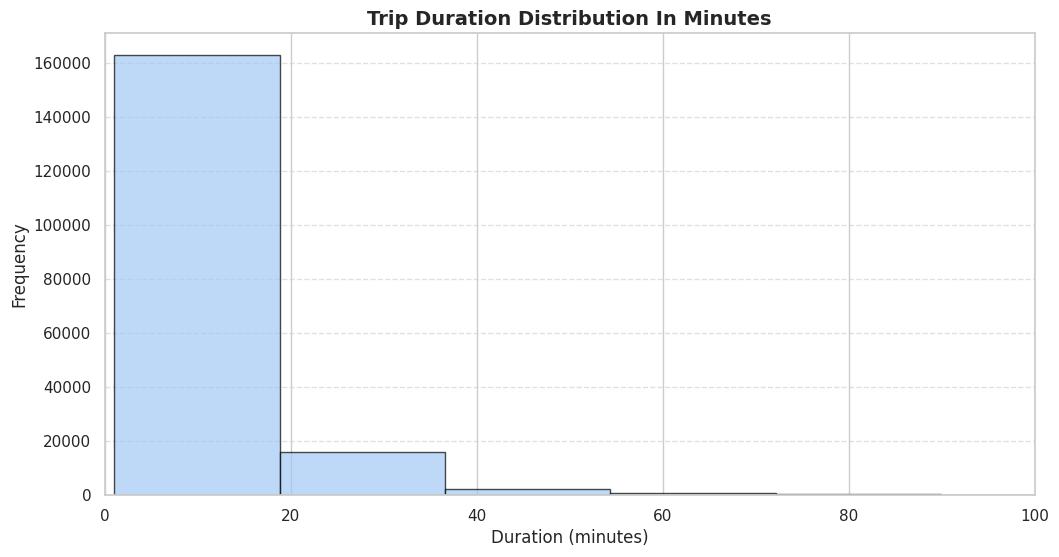

In [13]:

# Convert duration from seconds to minutes
data['duration_min'] = data['duration_sec'] / 60

plt.figure(figsize=(12, 6))
plt.hist(data['duration_min'], bins=80, edgecolor='black', alpha=0.7)
plt.title('Trip Duration Distribution In Minutes', fontsize=14, fontweight='bold')
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


The histogram shows that most bike trips in the dataset are short, typically under 15 minutes, indicating that the system is primarily used for quick commutes or short-distance travel. The distribution is right-skewed, with a sharp drop in frequency beyond 20 minutes, suggesting that longer trips are uncommon. A few outliers exceed 40 minutes, but they represent a small fraction of total rides. This pattern aligns with urban bike-sharing trends, where users rely on bikes for short, efficient trips rather than extended rides.




### Question 3: How are the different user types distributed in the dataset?

### Visualization:

<ipython-input-14-efa4fbdcc762>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


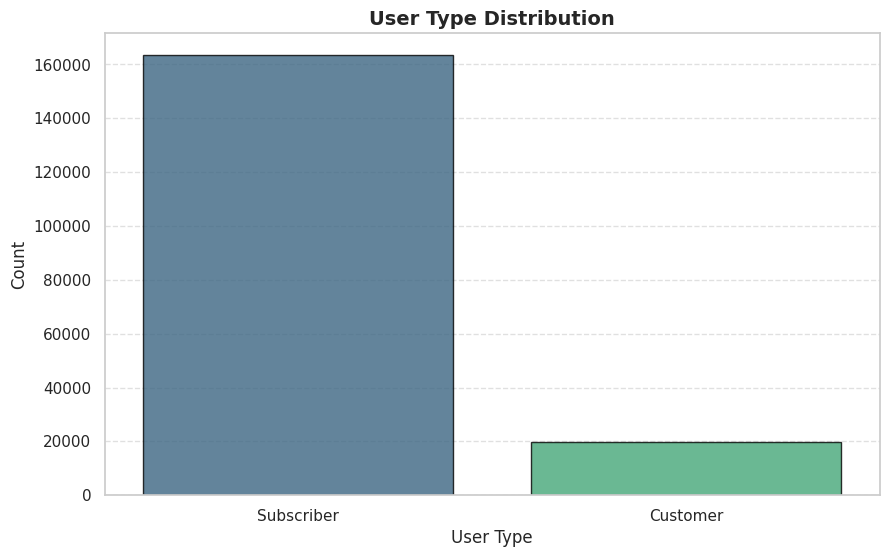

In [14]:
# Count the occurrences of each user type
user_type_counts = data['user_type'].value_counts()

# Create a bar plot with corrected data handling
plt.figure(figsize=(10, 6))
sns.barplot(
    x=user_type_counts.index,  # User type categories (Subscriber, Customer)
    y=user_type_counts.values,  # Corresponding counts
    palette='viridis',
    edgecolor='black',
    alpha=0.8
)

# Customize title and labels
plt.title('User Type Distribution', fontsize=14, fontweight='bold')
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.show()


### Observations
The bar chart shows that Subscribers make up the majority of bike users, while Customers (casual riders) represent a much smaller portion. This suggests that the bike-sharing system is primarily used by regular riders, likely commuters or residents with memberships, rather than occasional users like tourists. The dominance of subscribers indicates that long-term membership plays a crucial role in sustaining the service, which may influence pricing strategies and service improvements tailored to frequent riders.

### Question #3. What is the busiest hour of the day for bike riding?


### Visualization:

<ipython-input-15-deec40fb1090>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['start_hour'], palette='magma', edgecolor='black', alpha=0.8)


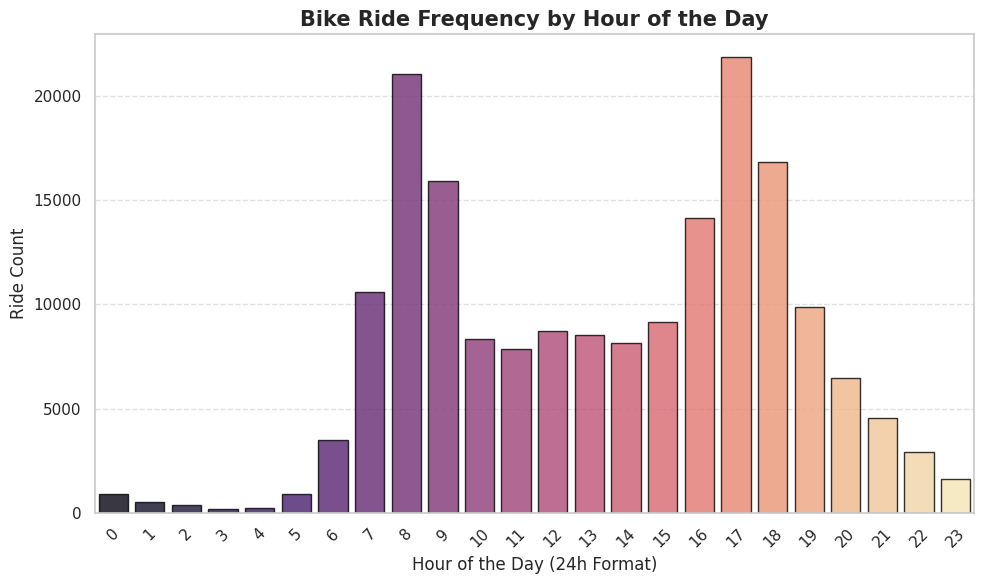

In [15]:
# Load the cleaned dataset
bike_data = pd.read_csv('/content/fordgobike_clean.csv')

# Convert 'start_time' to datetime format
bike_data['start_time'] = pd.to_datetime(bike_data['start_time'])

# Create a copy of the dataset
df = bike_data.copy()

# Extract the hour from 'start_time'
df['start_hour'] = df['start_time'].dt.hour

# Plot the distribution of bike rides by hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(x=df['start_hour'], palette='magma', edgecolor='black', alpha=0.8)

# Customize the plot
plt.title('Bike Ride Frequency by Hour of the Day', fontsize=15, fontweight='bold')
plt.xlabel('Hour of the Day (24h Format)', fontsize=12)
plt.ylabel('Ride Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()


### Observations
The bar chart illustrates bike ride frequency across different hours of the day, revealing distinct peaks during traditional commuting hours. The morning peak at 8 AM suggests that many users rely on bike-sharing for their morning commute to work or school. Similarly, the highest spike occurs between 5 PM and 6 PM, indicating heavy usage during evening rush hours, as people return home. Throughout the mid-morning to early afternoon (10 AM - 3 PM), the number of rides remains steady but significantly lower than peak times, likely representing casual riders, tourists, or those running errands.

Late-night and early-morning hours (12 AM - 4 AM) experience the lowest bike usage, suggesting minimal demand, possibly due to safety concerns or limited service availability. After 7 PM, there is a gradual decline in ridership, reflecting the end of typical work hours and reduced commuting needs. These trends suggest that the bike-sharing system is primarily commuter-driven, catering to daily work routines rather than leisure or late-night travel. Understanding these patterns could help optimize bike availability, docking station placement, and promotional efforts to encourage off-peak usage.

### Question 5: Which user type—subscribers or customers—rides more during peak hours?









### Visualization:

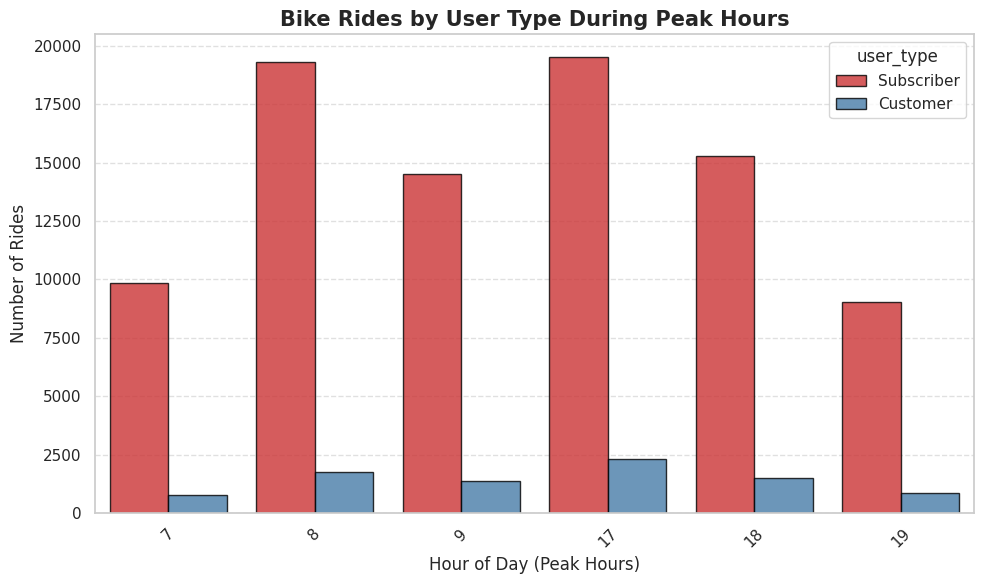

In [16]:
plt.figure(figsize=(10, 6))

# Define peak hours (7-9 AM and 5-7 PM)
peak_hours = df[df['start_hour'].isin([7, 8, 9, 17, 18, 19])]

# Plotting bike rides by user type during peak hours
sns.countplot(data=peak_hours, x='start_hour', hue='user_type', palette='Set1', edgecolor='black', alpha=0.8)

# Customize the plot
plt.title('Bike Rides by User Type During Peak Hours', fontsize=15, fontweight='bold')
plt.xlabel('Hour of Day (Peak Hours)', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()

### Observations:

The bar chart illustrates bike usage during peak commuting hours (7-9 AM and 5-7 PM), categorized by user type (Subscribers vs. Customers). It is evident that Subscribers dominate bike usage during these hours, significantly outnumbering Customers in all time slots. The highest activity occurs at 8 AM and 5 PM, which align with typical work commute times, reinforcing that most subscribers use the service for daily commuting. Customers, on the other hand, contribute a much smaller proportion of rides, suggesting that they use the service more for occasional or leisure trips rather than structured daily commutes.

### Question 6:On which day of the week do bike rides occur most frequently?









### visualization:

<ipython-input-17-2ba29a2008dd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day_of_week',


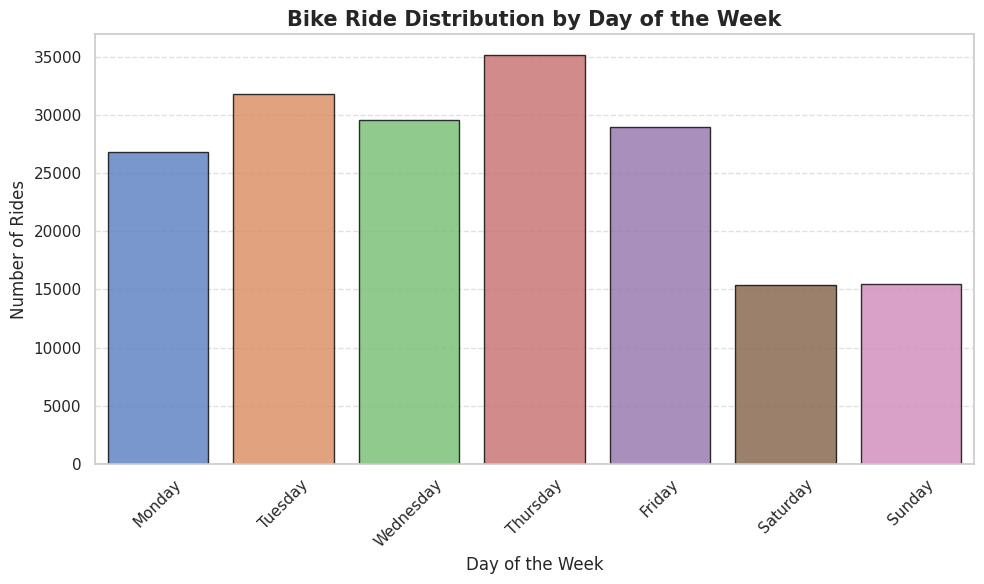

In [17]:
df['day_of_week'] = df['start_time'].dt.day_name()

# Create a count plot for bike rides by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
              palette='muted', edgecolor='black', alpha=0.8)

# Customize the plot
plt.title('Bike Ride Distribution by Day of the Week', fontsize=15, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()

### Observations:
The chart shows that bike usage is highest on Thursdays, followed by Wednesday and Friday, indicating that the system is primarily used for weekday commuting. Weekends (Saturday and Sunday) have the lowest ride counts, suggesting that fewer people use bike-sharing for leisure or recreational trips. Monday and Tuesday see moderate usage, possibly as people ease into their work routines. The overall trend highlights that bike-sharing is more popular on weekdays, with a significant drop on weekends, reinforcing its role as a commuter-driven transportation option.**bold text**

### Question 7:How are the start and end station groups structured?


### visualization:

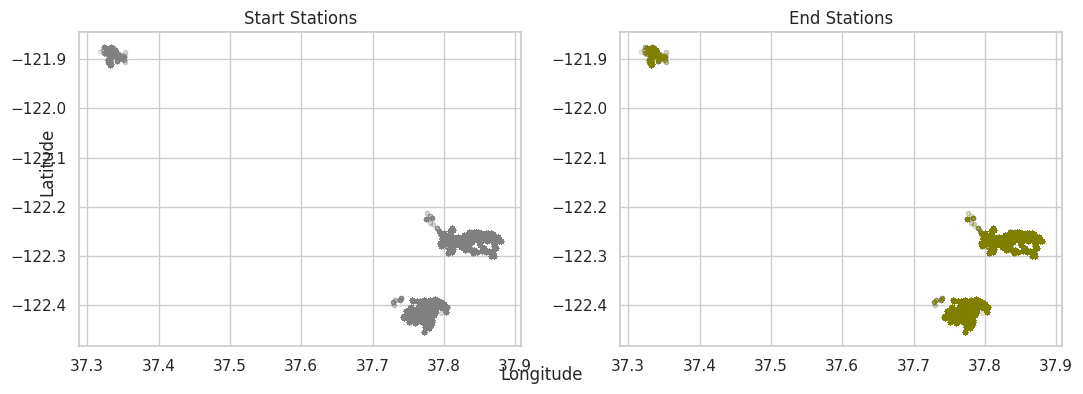

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 4))

axes[0].scatter(df["start_station_latitude"], df["start_station_longitude"],
                alpha=0.01, marker=".", color="gray")
axes[0].set_title("Start Stations")

axes[1].scatter(df["end_station_latitude"], df["end_station_longitude"],
                alpha=0.01, marker=".", color="olive")
axes[1].set_title("End Stations")

fig.text(0.5, 0.03, "Longitude", ha="center", fontsize=12)
fig.text(0.05, 0.5, "Latitude", ha="center", fontsize=12, rotation='vertical')

plt.tight_layout()
plt.show()


### Observations:
The scatter plots display the geographic distribution of start and end bike stations based on latitude and longitude coordinates. The majority of bike stations are concentrated in a few distinct clusters, likely representing different areas within the San Francisco Bay Area. The dense grouping of points suggests high bike activity in these locations, reinforcing the idea that bike-sharing usage is concentrated in key urban hubs. The left plot (start stations) and right plot (end stations) show a similar distribution, indicating that most trips begin and end within the same general locations, likely near transit hubs, business districts, or popular commuting areas. Additionally, a small cluster of stations appears farther away from the main concentration, possibly representing a separate city or suburban area connected to the system.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of bike rides by hour revealed distinct peaks during commute times, particularly at 8 AM and 5-6 PM, indicating that most users rely on the bike-sharing system for work or school commutes. As expected, ridership was extremely low between 12 AM and 5 AM, reflecting minimal demand during late-night hours. There were no unusual spikes, but the data clearly highlighted a pattern of weekday commuting behavior. To analyze this trend, I first converted the start_time column to datetime format, allowing me to extract the hour of the day for a more detailed breakdown.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The data didn’t exhibit any extreme outliers, but bike usage was noticeably skewed towards typical working hours. To facilitate analysis, I converted the start_time column to datetime format, allowing me to extract both the hour and day. This step was essential for uncovering time-based trends in bike usage and understanding when the system is most frequently utilized.



## Bivariate Exploration



### Question 1: How does rider age impact trip duration?









### visualization:

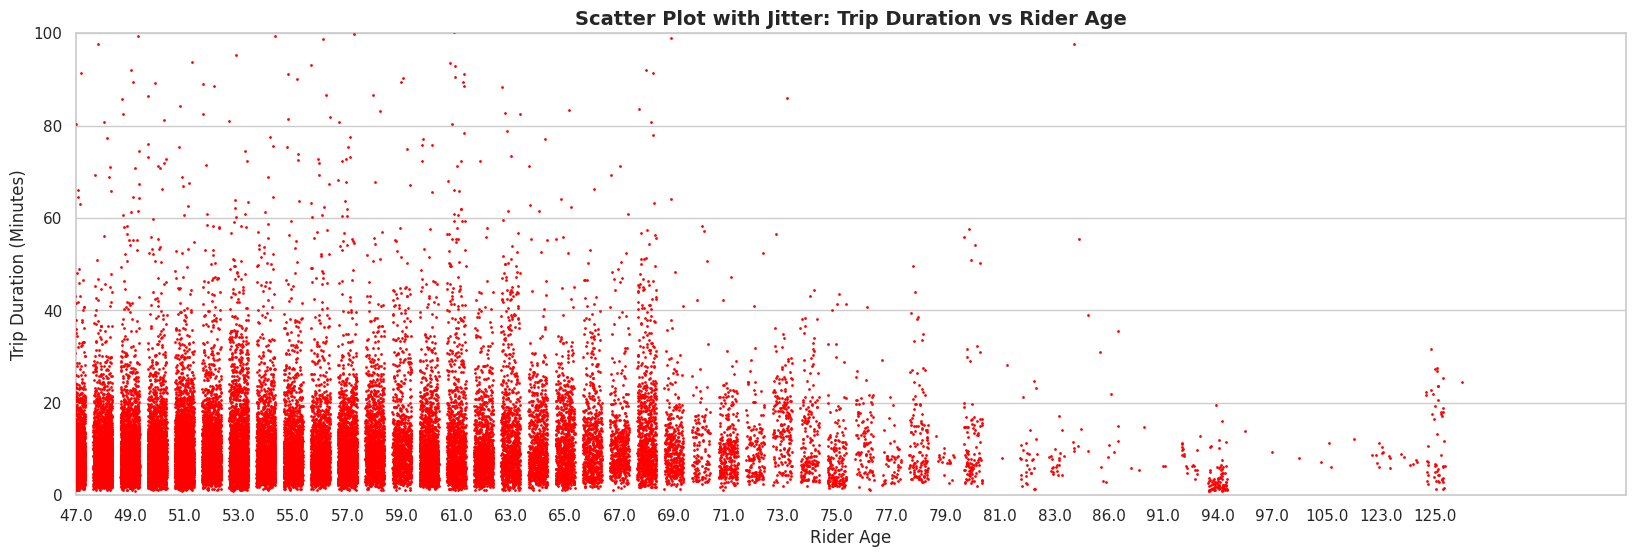

In [19]:
plt.figure(figsize=(20, 6))

sns.stripplot(data=df.query('member_age >= 23'),
              x='member_age',
              y='duration_min',
              size=2,
              jitter=0.35,
              color='red')

# Customize title and labels
plt.title('Scatter Plot with Jitter: Trip Duration vs Rider Age', fontsize=14, fontweight='bold')
plt.xlabel('Rider Age', fontsize=12)
plt.ylabel('Trip Duration (Minutes)', fontsize=12)

plt.xticks(ticks=range(23, 81, 2))

plt.xlim(23, 80)
plt.ylim(0, 100)

plt.show()

### Observation:
The scatter plot visualizes the relationship between rider age and trip duration in minutes. The majority of trips, regardless of age, are concentrated under 20 minutes, indicating that most bike rides are short. There is a noticeable spread of longer-duration trips, but they become increasingly rare as trip time exceeds 60 minutes. Additionally, while younger riders appear to take a slightly broader range of trip durations, older riders generally follow the same trend. There are no strong correlations between age and trip duration, suggesting that bike usage patterns remain fairly consistent across different age groups.

### Question 2: How does trip duration differ between subscribers and customers?









### visualization:

<ipython-input-20-3eb2bd37d2d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='user_type', y='duration_min', palette='coolwarm', width=0.6, notch=True, showfliers=False)


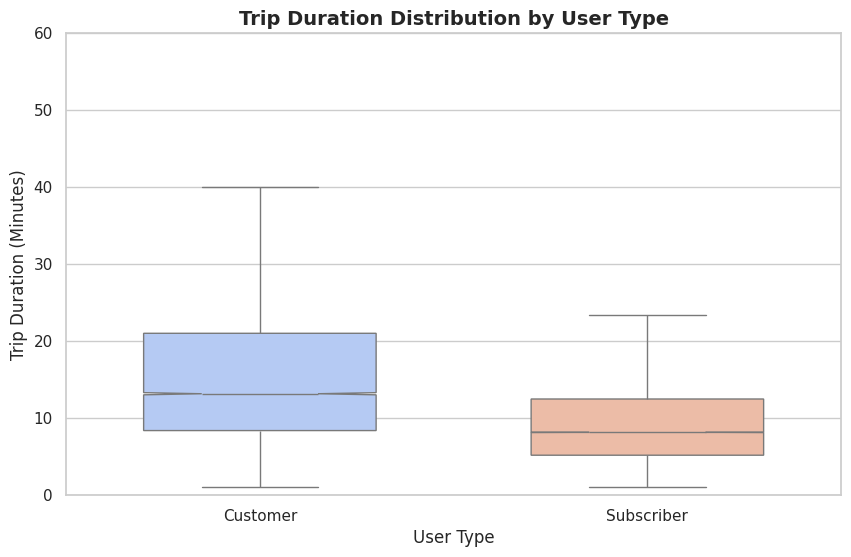

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='user_type', y='duration_min', palette='coolwarm', width=0.6, notch=True, showfliers=False)
plt.title('Trip Duration Distribution by User Type', fontsize=14, fontweight='bold')
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Trip Duration (Minutes)', fontsize=12)

plt.ylim(0, 60)

plt.show()

### Observation:
The box plot illustrates the distribution of trip durations for Customers and Subscribers. Customers tend to have longer trip durations, with a median duration around 13-15 minutes, and a wider interquartile range (IQR), indicating greater variability in trip lengths. Some customers take trips extending beyond 40 minutes. In contrast, Subscribers generally have shorter and more consistent trip durations, with a median closer to 8-10 minutes and fewer long-duration rides. This suggests that Subscribers primarily use the bike-sharing service for short, routine commutes, whereas Customers might use it for leisure or occasional longer trips.

### Question 3: How does ride frequency vary by user type throughout the week?

### visualization:

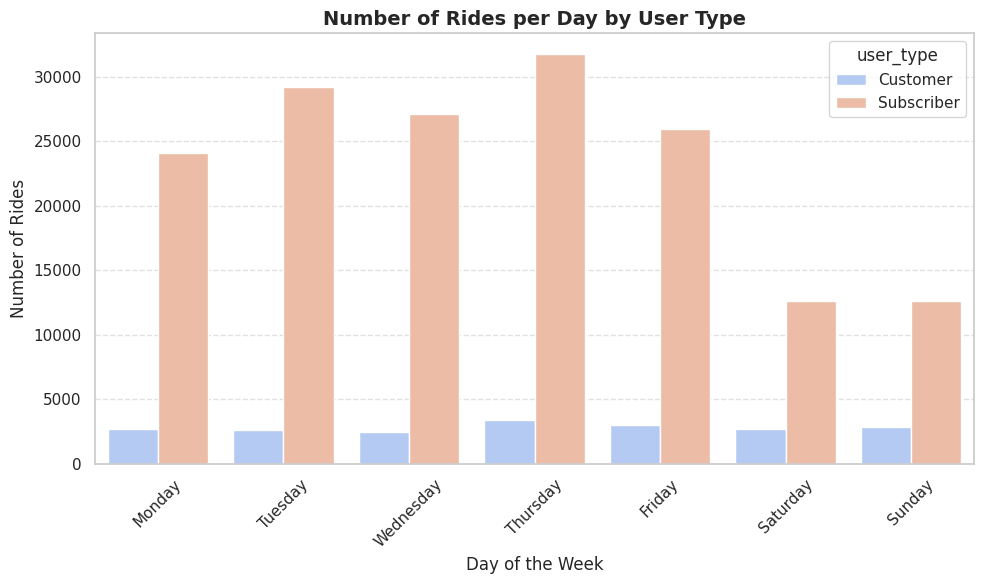

In [21]:
# Create a count plot to show ride frequency by user type across the days of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', hue='user_type', palette='coolwarm',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Customize the plot
plt.title('Number of Rides per Day by User Type', fontsize=14, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()


### Observation:
The chart shows the distribution of bike rides by user type (Subscriber vs. Customer) across the days of the week. Subscribers dominate the ridership on most days, with a noticeable spike in usage on Thursday, indicating it is the busiest day for bike usage. Customers, however, show a more consistent but lower number of rides throughout the week, with their highest usage also on Thursday. This suggests that Subscribers are the primary users of the bike-sharing system, likely for daily commuting, while Customers tend to use the service more sporadically, perhaps for leisure or occasional use.















### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> I noticed that customers typically had longer trip durations compared to subscribers, which implies that customers may be using the bikes for leisure rides, whereas subscribers likely use them for shorter, routine commutes. Furthermore, bike usage peaked during commuting hours, reinforcing the idea that subscribers primarily rely on the bikes for their daily commutes.





### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, I observed that subscribers tended to ride more on weekdays, especially on Fridays, while customers showed more consistent usage throughout the week, with a slight uptick on weekends. This suggests that subscribers primarily use the bikes for commuting to work, while customers likely use them for recreational purposes.

## Multivariate Exploration



### Question 1:How does trip duration differ between user types, and how does this variation change throughout the week?








### visualization:

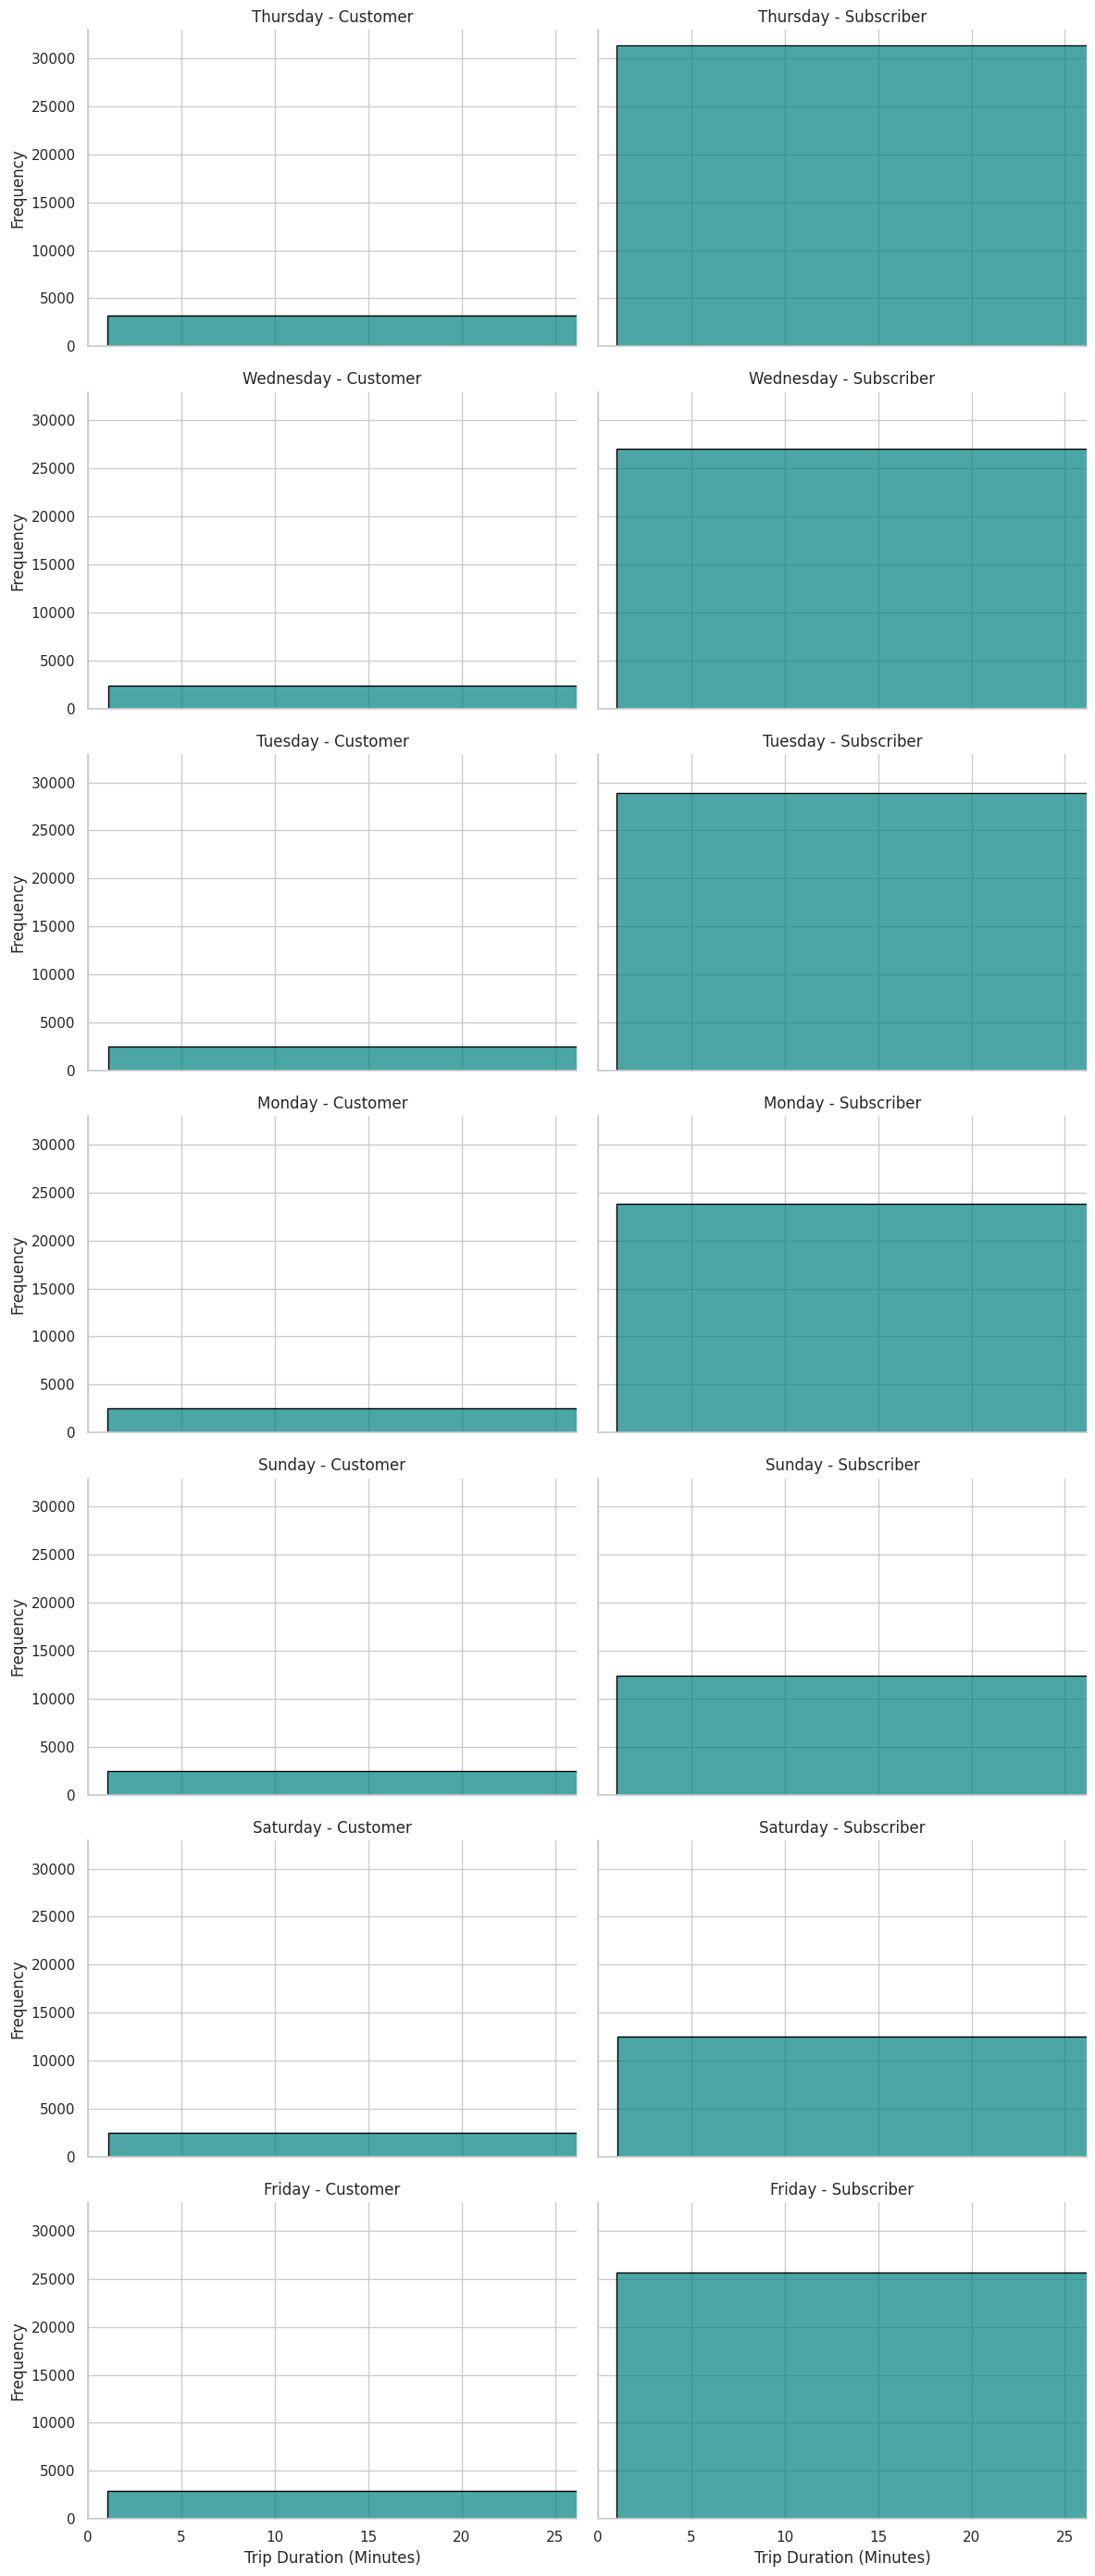

In [24]:
percentile_95 = df['duration_min'].quantile(0.95)

g = sns.FacetGrid(df, col="user_type", row="day_of_week", height=4, aspect=1.5)
g.map_dataframe(sns.histplot, "duration_min", bins=30, kde=False, color='teal', edgecolor='black', alpha=0.7)

g.set_axis_labels("Trip Duration (Minutes)", "Frequency")
g.set_titles("{row_name} - {col_name}", fontsize=12)

for ax in g.axes.flatten():
    ax.set_xlim(0, percentile_95)

g.tight_layout()
plt.show()


### Observation:
The chart shows the distribution of trip durations for both Customers and Subscribers across each day of the week. For Subscribers, the trip durations are consistently short, with most trips falling between 0 and 10 minutes. This suggests that subscribers are likely using the bikes for commuting or other short, routine trips, with usage being fairly consistent throughout the week.

For Customers, the trip durations are notably much shorter, often limited to a very small range (close to 0-5 minutes). This could indicate that Customers are primarily using the bikes for very brief, leisure-based activities or just short-term rentals. The minimal variation in trip durations across the days of the week suggests that these rides are not influenced by the day of the week as much as Subscriber usage.

In both cases, the data suggests that the bike-sharing service is more frequently used by Subscribers for commuting during the weekdays, with minimal use by Customers during the weekend.


### Question 2: How are trip duration, rider age, and user type related?








### visualization:

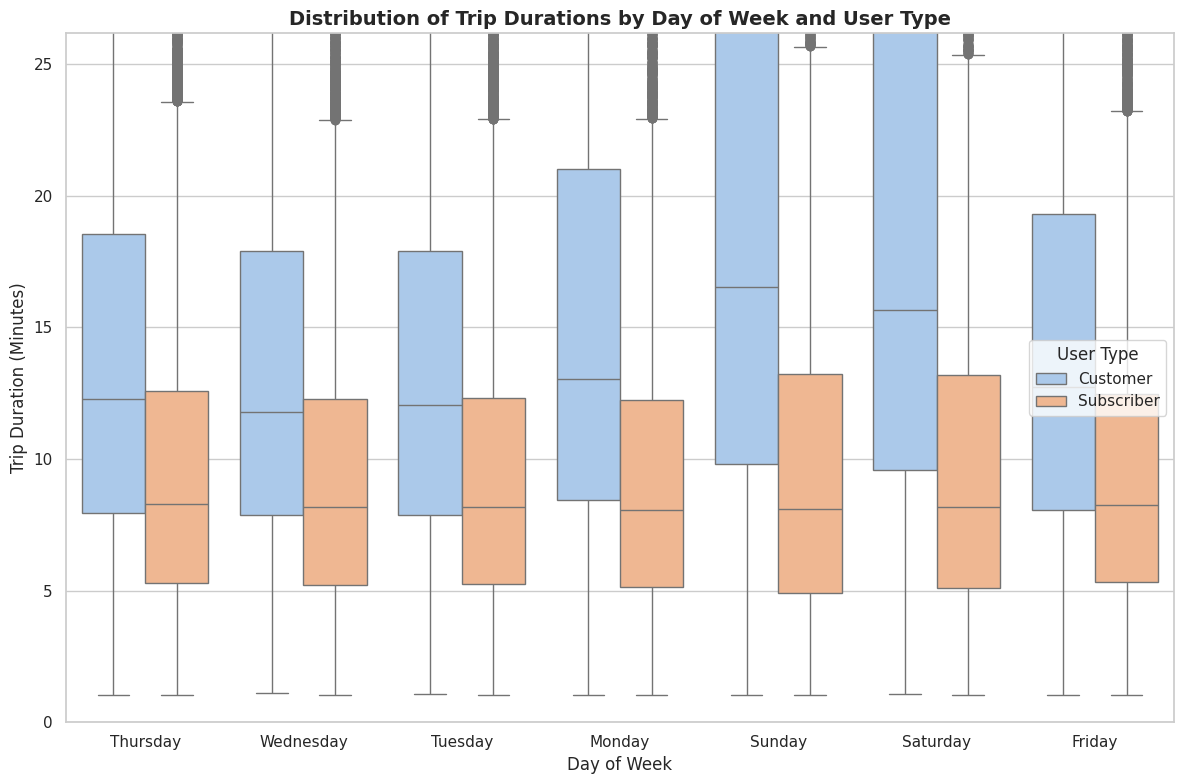

In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='day_of_week', y='duration_min', hue='user_type', palette='pastel')

plt.title('Distribution of Trip Durations by Day of Week and User Type', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Trip Duration (Minutes)', fontsize=12)
plt.ylim(0, df['duration_min'].quantile(0.95))

plt.legend(title='User Type')
plt.tight_layout()
plt.show()


### Observation:
The box plot illustrates the distribution of trip durations by day of the week and user type (Customer vs. Subscriber). From the plot, we can see that Subscribers generally have shorter trips (with median durations around 10 minutes), particularly consistent across weekdays. Their trips are also less variable, with a smaller interquartile range (IQR), suggesting that they typically use the service for commuting or routine trips.

In contrast, Customers tend to have longer trips (with median durations between 12-18 minutes), especially on weekdays (Thursday, Friday), indicating that their rides are likely for leisure or occasional purposes. Their IQRs are wider, indicating more variability in trip duration. There are also noticeable outliers for Customers in certain days, suggesting that some customers take significantly longer trips than others.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this part of the analysis, I noticed a clear relationship between user type and trip duration throughout the week. The box plots revealed that customers generally take longer trips than subscribers, especially on the weekends. This supports the idea that subscribers are likely using the service for commuting, while customers are more inclined to use it for leisure or recreation. The weekend trend further emphasized that customers take longer trips on Saturdays and Sundays, while subscribers tend to have shorter, more consistent trips during the weekdays.

### Were there any interesting or surprising interactions between features?

> An intriguing interaction emerged between user type, trip duration, and day of the week. While it was expected that subscribers would take shorter trips, the consistency of this pattern across the week was surprising. Another unexpected finding was the significant increase in customer trip durations on weekends compared to weekdays. This reveals a notable difference in how each user group utilizes the service, with customers favoring weekends for longer, more leisurely rides, while subscribers maintain shorter, more regular trips throughout the week.

## Conclusion
> Peak Hours: Bike usage peaks around 8 AM and 5-6 PM, which aligns with typical commuting times, as people are heading to and from work.

> Trip Length: Subscribers tend to take shorter rides, getting in and out quickly. However, customers’ trips are noticeably longer, especially on weekends, suggesting they’re out for extended leisure rides.

> Usage Patterns: Subscribers stick to weekday riding, primarily for commuting to work. Customers, on the other hand, show more balanced usage throughout the week but tend to favor weekends for more frequent riding.

> Age vs. Trip Duration: Age doesn’t seem to significantly impact trip duration. Whether a subscriber or a customer, riders of all ages have fairly similar patterns when it comes to how long they stay on the bike.

